In [393]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
dataset = pd.read_csv('diabetes-dataset.csv')

In [395]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [396]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [397]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Step 2: Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

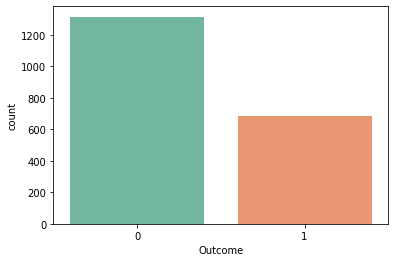

In [398]:
sns.countplot(x = 'Outcome',data = dataset, palette='Set2')

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


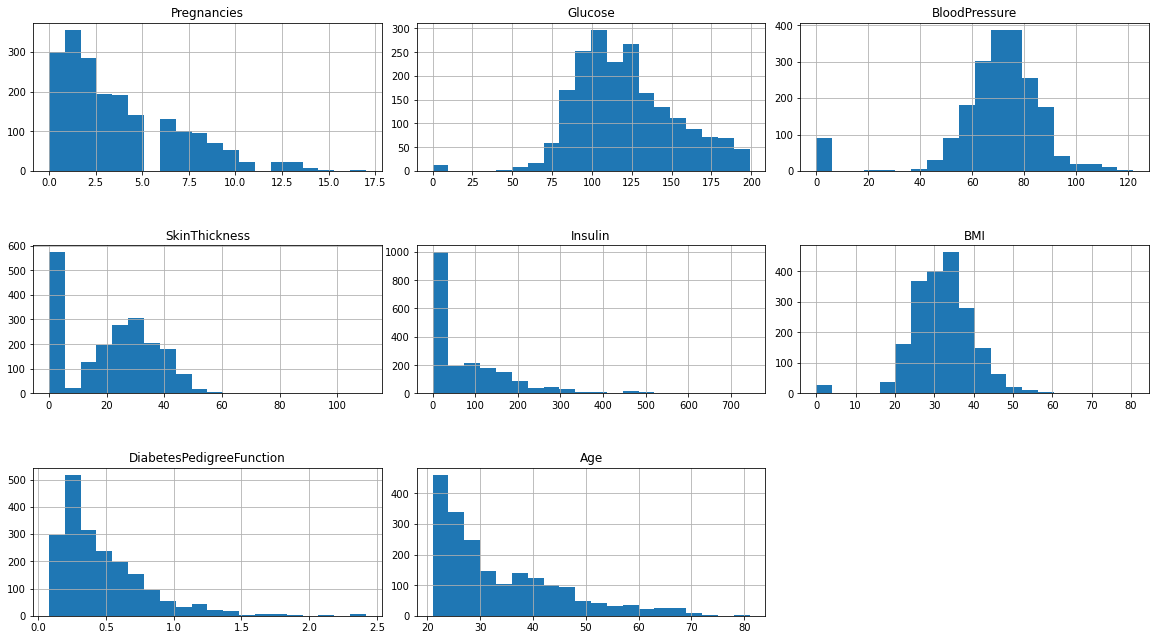

In [399]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

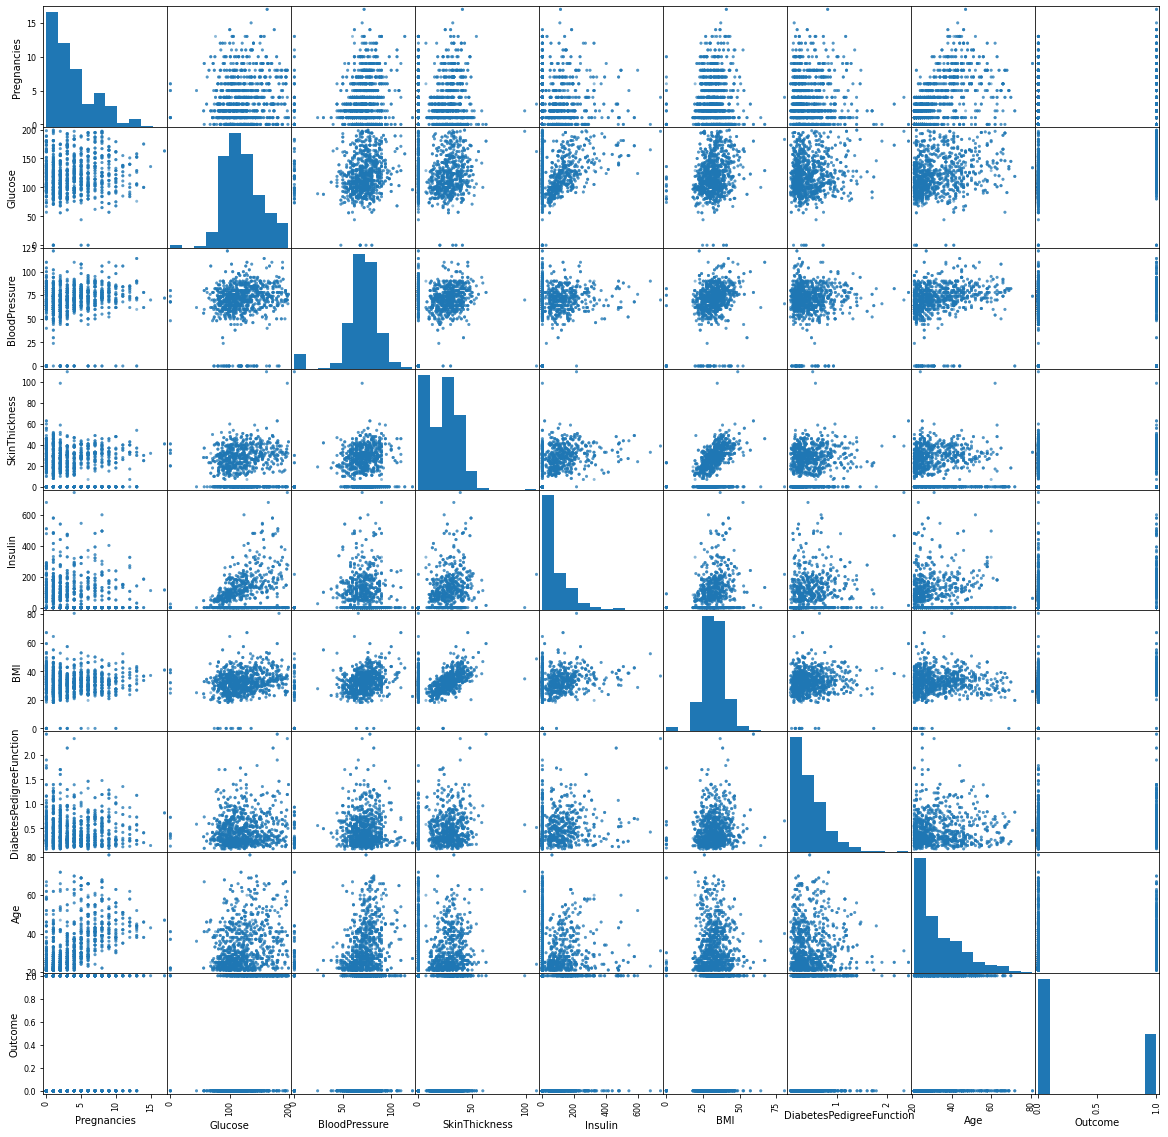

In [400]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

In [401]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# Step 3: Data Preprocessing



In [402]:

dataset.fillna(0)
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['Outcome'] )

In [404]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# Step 4: Data Modelling

In [405]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 42,gamma='scale')
svc.fit(X_train, Y_train)


SVC(random_state=42)

In [406]:
Y_pred_svc = svc.predict(X_test)

In [407]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42, max_iter=10000)
logreg.fit(X_train, Y_train)


LogisticRegression(max_iter=10000, random_state=42)

In [408]:
Y_pred_logreg = logreg.predict(X_test)



In [409]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, Y_train.ravel())


RandomForestClassifier(random_state=42)

In [410]:
rf_predict_train = rf_model.predict(X_test)

# Step 5: Model Evaluation

In [411]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import metrics


rf_accuracy = metrics.accuracy_score(Y_test, rf_predict_train)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

In [412]:
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Logistic Regression: " + str(accuracy_logreg * 100))
print ("Random forest Accuracy: {0:.4f}".format(rf_accuracy*100))

Support Vector Classifier: 77.25
Logistic Regression: 80.25
Random forest Accuracy: 98.5000


# Step 6: Dimenstional Reduction

# PCA

In [413]:
from sklearn.decomposition import PCA

pca = PCA(0.995)
pca.fit(X_train)

PCA(n_components=0.995)

In [414]:
X_train_tranformed = pca.transform(X_train)
X_test_tranformed = pca.transform(X_test)

In [415]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_tranformed, Y_train)


Y_pred_svc = svc.predict(X_test_tranformed)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 78.25


In [416]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_tranformed , Y_train.ravel())

rf_predict_train = rf_model.predict(X_test_tranformed )


rf_accuracy = metrics.accuracy_score(Y_test, rf_predict_train)


print ("Random forest Accuracy: "+str(rf_accuracy*100))

Random forest Accuracy: 98.25


## LDA

In [417]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [418]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train_scaled, Y_train)

X_train_transformed = lda.transform(X_train_scaled)
X_test_transformed = lda.transform(X_test_scaled)

In [419]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_tranformed, Y_train)


Y_pred_svc = svc.predict(X_test_tranformed)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 78.25


In [420]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_transformed, Y_train.ravel())

rf_predict_train = rf_model.predict(X_test_transformed)

#get accuracy
rf_accuracy = metrics.accuracy_score(Y_test, rf_predict_train)

#print accuracy
print ("Random forest Accuracy: {0:.4f}".format(rf_accuracy*100))

Random forest Accuracy: 98.2500
